In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
%matplotlib inline

Text(0.5, 1.0, '2011 png, (1106, 1708, 3)')

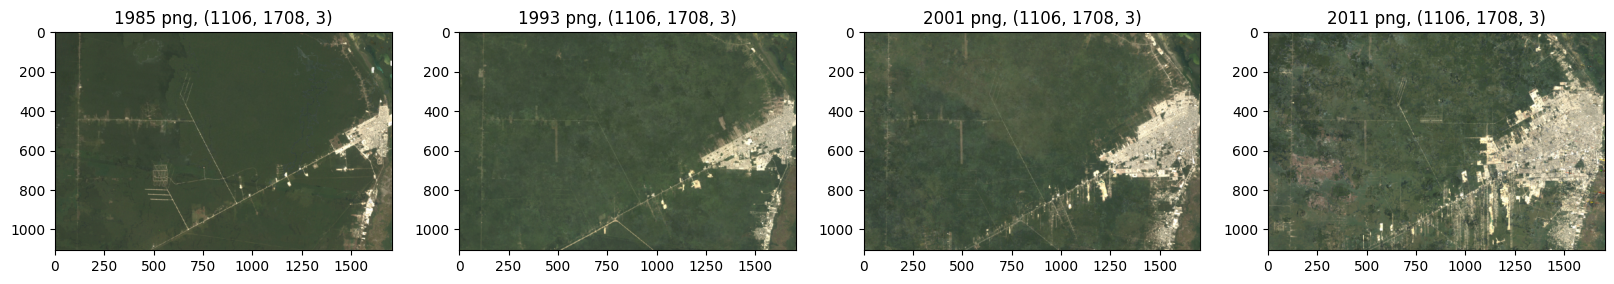

In [3]:
# Read in Images
image1 = cv2.imread("../examples/Applications/Images/1985.png")
image2 = cv2.imread("../examples/Applications/Images/1993.png")
image3 = cv2.imread("../examples/Applications/Images/2001.png")
image4 = cv2.imread("../examples/Applications/Images/2011.png")

fig, ax = plt.subplots(1,4, figsize=(20,10))
ax[0].imshow(image1[:,:,::-1]); ax[0].set_title(f"1985 png, {image1.shape}")
ax[1].imshow(image2[:,:,::-1]); ax[1].set_title(f"1993 png, {image2.shape}")
ax[2].imshow(image3[:,:,::-1]); ax[2].set_title(f"2001 png, {image3.shape}")
ax[3].imshow(image4[:,:,::-1]); ax[3].set_title(f"2011 png, {image4.shape}")

Text(0.5, 1.0, '2011 B Ch')

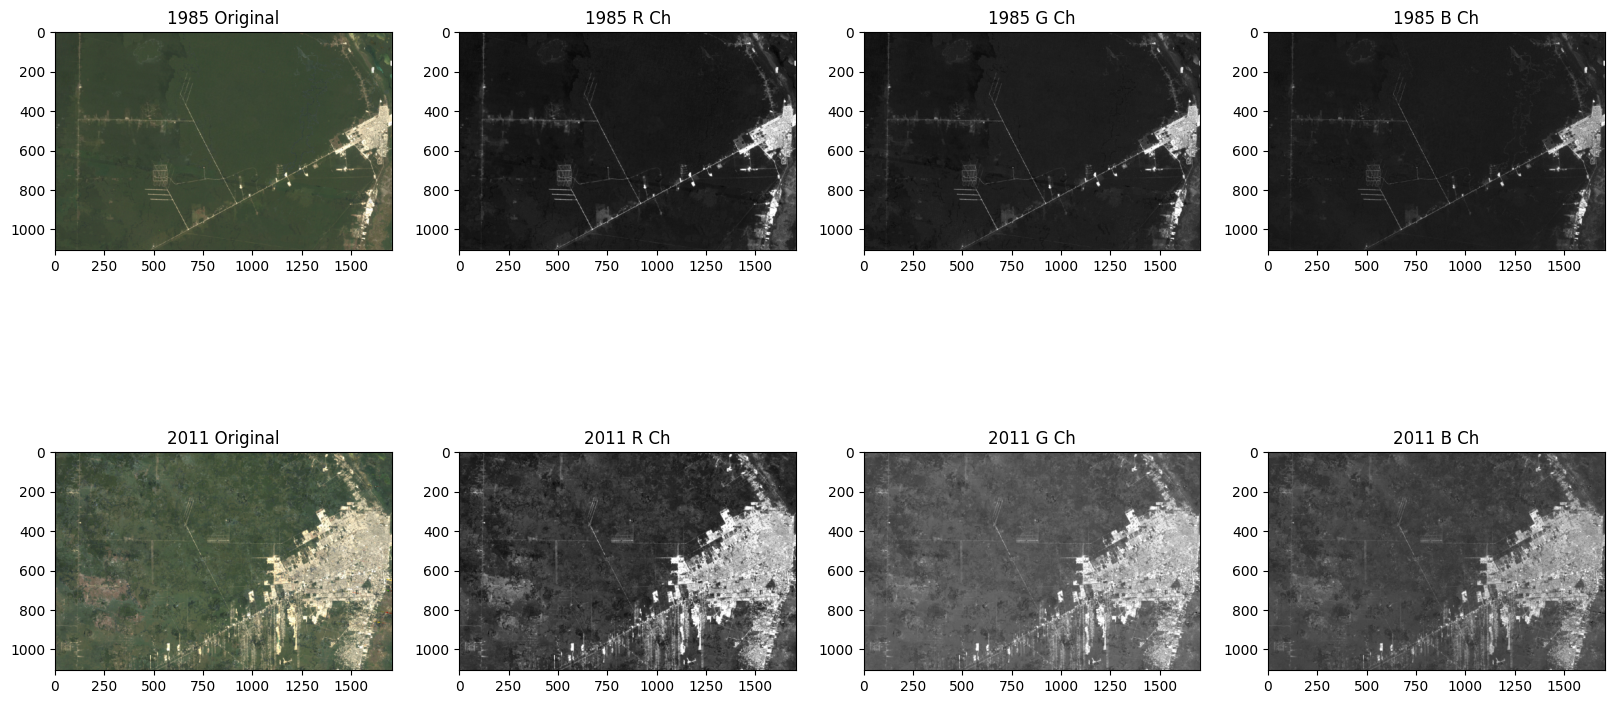

In [4]:
fig, ax = plt.subplots(2,4, figsize=(20,10))

b1, g1, r1 =  cv2.split(image1)
ax[0,0].imshow(image1[:,:,::-1]); ax[0,0].set_title("1985 Original")
ax[0,1].imshow(r1, cmap="gray"); ax[0,1].set_title("1985 R Ch")
ax[0,2].imshow(g1, cmap="gray"); ax[0,2].set_title("1985 G Ch")
ax[0,3].imshow(b1, cmap="gray"); ax[0,3].set_title("1985 B Ch")

b4, g4, r4 = cv2.split(image4)
ax[1,0].imshow(image4[:,:,::-1]); ax[1,0].set_title("2011 Original")
ax[1,1].imshow(r4, cmap="gray"); ax[1,1].set_title("2011 R Ch")
ax[1,2].imshow(g4, cmap="gray"); ax[1,2].set_title("2011 G Ch")
ax[1,3].imshow(b4, cmap="gray"); ax[1,3].set_title("2011 B Ch")

In [5]:
# Calculate the histograms
def histogram(image, title="",y_scale="linear",w=5):
    hist_b = cv2.calcHist(image, [0], None, [256], [0,255])
    hist_g = cv2.calcHist(image, [1], None, [256], [0,255])
    hist_r = cv2.calcHist(image, [2], None, [256], [0,255])

    def moving_average(x,w):
        x = np.ravel(x)
        return np.convolve(x, np.ones(w), "valid") /w
    
    hist_b, hist_g, hist_r = [moving_average(hist_b,w), moving_average(hist_g,w), moving_average(hist_r,w)]

    fig, ax = plt.subplots(1,3, figsize=(20,5))
    fig.suptitle(title)
    ax[0].plot(hist_r, color='r');
    ax[1].plot(hist_g, color='g');
    ax[2].plot(hist_b, color='b');

    y_max = max(hist_r.max(), hist_g.max(), hist_b.max())
    for axis in ax:
        axis.grid(True)
        if y_scale == "linear":
            axis.set_ylim([0,y_max])
        else:
            axis.set_yscale(y_scale)

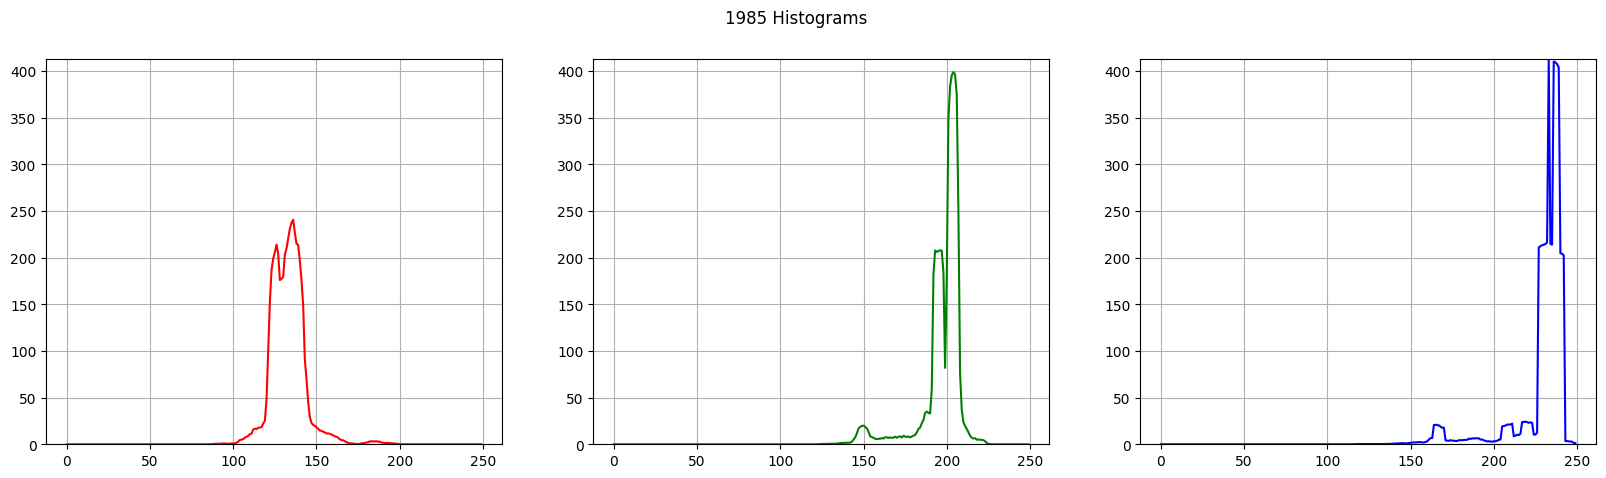

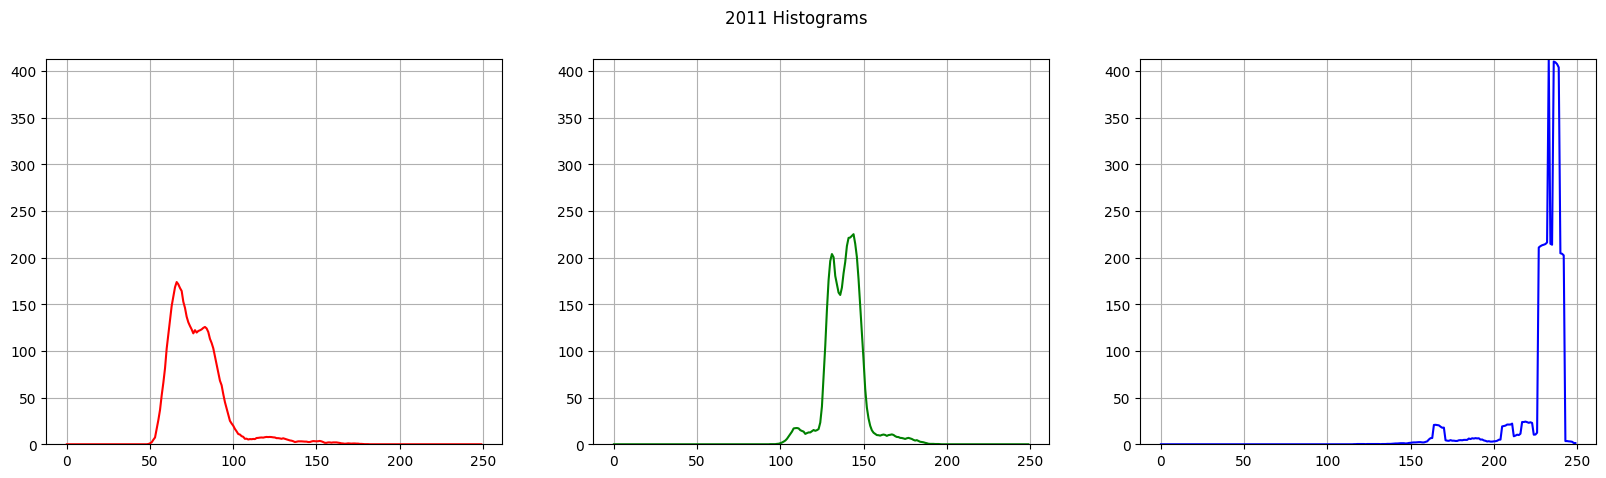

In [6]:
w = 7
histogram(image1,"1985 Histograms",w=w)
histogram(image4, "2011 Histograms",w=w)
# histogram(image1,"1985 Histograms-log","log",w=w)
# histogram(image4, "2011 Histograms-log","log",w=w)

In [7]:
def detect_green(image):
    # Create range for cv2.inRange
    lowerb = np.array([0,50,0], dtype="uint8")
    upperb = np.array([255,100,255], dtype="uint8")

    # Create mask using cv2.inRange
    mask = cv2.inRange(image,lowerb,upperb)

    return mask

Text(0.5, 1.0, '2011 Segmented')

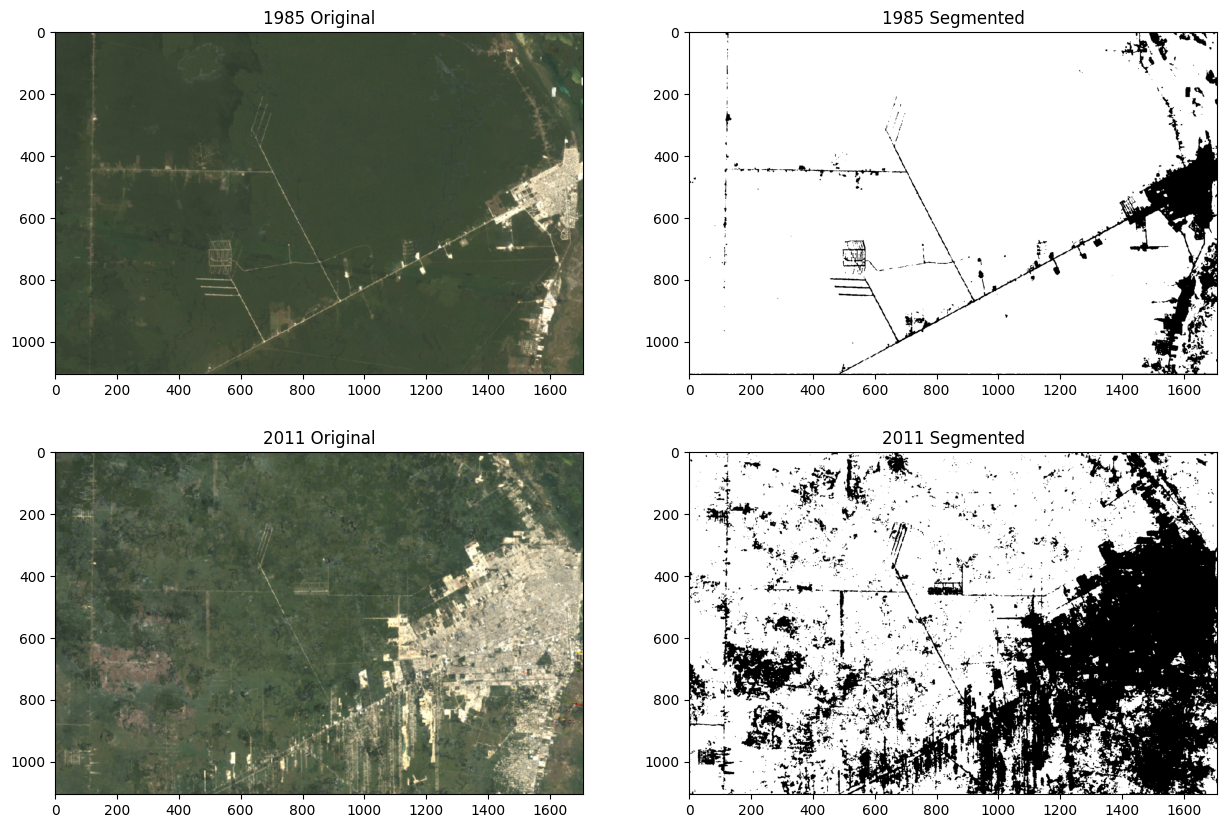

In [8]:
green_1985 = detect_green(image1)
green_2011 = detect_green(image4)

fig, ax = plt.subplots(2,2, figsize=(15,10))
ax[0,0].imshow(image1[:,:,::-1]); ax[0,0].set_title("1985 Original")
ax[0,1].imshow(green_1985,cmap="gray"); ax[0,1].set_title("1985 Segmented")
ax[1,0].imshow(image4[:,:,::-1]); ax[1,0].set_title("2011 Original")
ax[1,1].imshow(green_2011,cmap="gray"); ax[1,1].set_title("2011 Segmented")

## Detect percentage of non-zero pixels

In [18]:
def green_percent(image):
    return round(image.mean()/255,3)*100

93.4

65.8